In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
my_playlist = pd.read_csv(r'C:\Users\Dussand\Desktop\proyectsDS\Python\Machine Learning\spotify\myplaylist_spotify\data\my_playlist.csv')
my_playlist.head()

,Unnamed: 0,name,artist,album,duration_sec,popularity,release_date,album_image_url,genres
0,0,Like That,Future,WE DON'T TRUST YOU,267.706,85,2024-03-22,https://i.scdn.co/image/ab67616d0000b273a46b07...,"atl hip hop, hip hop, rap, southern hip hop, trap"
1,1,Feel The Fiyaaaah (with A$AP Rocky & feat. Tak...,Metro Boomin,HEROES & VILLAINS,189.426,67,2022-12-02,https://i.scdn.co/image/ab67616d0000b273c4fee5...,rap
2,2,Count Me Out,Kendrick Lamar,Mr. Morale & The Big Steppers,283.642,75,2022-05-13,https://i.scdn.co/image/ab67616d0000b2732e0211...,"conscious hip hop, hip hop, rap, west coast rap"
3,3,CARNIVAL,¥$,VULTURES 1,264.324,55,2024-02-09,https://i.scdn.co/image/ab67616d0000b2730a31b4...,NaN
4,4,Praise God,Kanye West,Donda,226.652,72,2021-08-29,https://i.scdn.co/image/ab67616d0000b273cad190...,"chicago rap, hip hop, rap"


In [3]:
my_playlist = my_playlist.drop(columns=['Unnamed: 0'])


In [4]:
my_playlist

,name,artist,album,duration_sec,popularity,release_date,album_image_url,genres
0,Like That,Future,WE DON'T TRUST YOU,267.706,85,2024-03-22,https://i.scdn.co/image/ab67616d0000b273a46b07...,"atl hip hop, hip hop, rap, southern hip hop, trap"
1,Feel The Fiyaaaah (with A$AP Rocky & feat. Tak...,Metro Boomin,HEROES & VILLAINS,189.426,67,2022-12-02,https://i.scdn.co/image/ab67616d0000b273c4fee5...,rap
2,Count Me Out,Kendrick Lamar,Mr. Morale & The Big Steppers,283.642,75,2022-05-13,https://i.scdn.co/image/ab67616d0000b2732e0211...,"conscious hip hop, hip hop, rap, west coast rap"
3,CARNIVAL,¥$,VULTURES 1,264.324,55,2024-02-09,https://i.scdn.co/image/ab67616d0000b2730a31b4...,NaN
4,Praise God,Kanye West,Donda,226.652,72,2021-08-29,https://i.scdn.co/image/ab67616d0000b273cad190...,"chicago rap, hip hop, rap"
...,...,...,...,...,...,...,...,...
181,Believe What I Say,Kanye West,Donda,242.400,61,2021-08-29,https://i.scdn.co/image/ab67616d0000b273cad190...,"chicago rap, hip hop, rap"
182,Wet Dreamz,J. Cole,2014 Forest Hills Drive,239.266,80,2014-12-09,https://i.scdn.co/image/ab67616d0000b273c6e094...,"conscious hip hop, hip hop, north carolina hip..."
183,LUST.,Kendrick Lamar,DAMN.,307.880,64,2017-04-14,https://i.scdn.co/image/ab67616d0000b2738b52c6...,"conscious hip hop, hip hop, rap, west coast rap"
184,YAH.,Kendrick Lamar,DAMN.,160.293,66,2017-04-14,https://i.scdn.co/image/ab67616d0000b2738b52c6...,"conscious hip hop, hip hop, rap, west coast rap"


In [5]:
# Separar la columna 'genres' por comas y expandir los resultados en columnas
genres_split = my_playlist['genres'].str.split(', ', expand=True)

# Renombrar las columnas resultantes
genres_split.columns = [f'genre_{i+1}' for i in range(genres_split.shape[1])]

# Convertir todos los valores de la columna 'genres' a cadenas por si acaso hay valores no string
my_playlist['genres'] = my_playlist['genres'].astype(str)

# Contar la cantidad de géneros en cada fila
my_playlist['genre_count'] = my_playlist['genres'].apply(lambda x: len(x.split(', ')))

# Unir el DataFrame original con el DataFrame de géneros separados
my_playlist = pd.concat([my_playlist, genres_split], axis=1)

In [6]:
my_playlist.head()

,name,artist,album,duration_sec,popularity,release_date,album_image_url,genres,genre_count,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,Like That,Future,WE DON'T TRUST YOU,267.706,85,2024-03-22,https://i.scdn.co/image/ab67616d0000b273a46b07...,"atl hip hop, hip hop, rap, southern hip hop, trap",5,atl hip hop,hip hop,rap,southern hip hop,trap,None,None
1,Feel The Fiyaaaah (with A$AP Rocky & feat. Tak...,Metro Boomin,HEROES & VILLAINS,189.426,67,2022-12-02,https://i.scdn.co/image/ab67616d0000b273c4fee5...,rap,1,rap,None,None,None,None,None,None
2,Count Me Out,Kendrick Lamar,Mr. Morale & The Big Steppers,283.642,75,2022-05-13,https://i.scdn.co/image/ab67616d0000b2732e0211...,"conscious hip hop, hip hop, rap, west coast rap",4,conscious hip hop,hip hop,rap,west coast rap,None,None,None
3,CARNIVAL,¥$,VULTURES 1,264.324,55,2024-02-09,https://i.scdn.co/image/ab67616d0000b2730a31b4...,nan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Praise God,Kanye West,Donda,226.652,72,2021-08-29,https://i.scdn.co/image/ab67616d0000b273cad190...,"chicago rap, hip hop, rap",3,chicago rap,hip hop,rap,None,None,None,None


In [128]:
#artistas con mas presencia en mi playlist

artist_frecuency =  my_playlist.groupby('artist')['name'].count().sort_values(ascending=False).reset_index()
artist_frecuency.head()

,artist,name
0,Kanye West,39
1,Kendrick Lamar,33
2,Drake,12
3,21 Savage,10
4,¥$,10


In [129]:
#canciones con mayor duracion
songs_time = my_playlist.groupby('name')['duration_sec'].sum().reset_index().sort_values('duration_sec', ascending=False)
songs_time['duration_min'] = songs_time['duration_sec'] / 60 
songs_time

,name,duration_sec,duration_min
140,"Sing About Me, I'm Dying Of Thirst",723.573,12.059550
131,Runaway,547.733,9.128883
7,4 Your Eyez Only,530.253,8.837550
67,"God Is Fair, Sexy Nasty (feat. Kendrick Lamar)",500.960,8.349333
6,3500 (feat. Future & 2 Chainz),461.840,7.697333
...,...,...,...
47,Every Hour,112.239,1.870650
17,BURN,111.458,1.857633
61,Follow God,104.591,1.743183
137,Serio,64.693,1.078217


In [130]:
#albumes con mas canciones en mi playlist
albumes = my_playlist.groupby(['album', 'artist'])['name'].count().reset_index().sort_values('name', ascending=False) 
albumes

,album,artist,name
18,DAMN.,Kendrick Lamar,10
80,VULTURES 1,¥$,9
77,To Pimp A Butterfly,Kendrick Lamar,8
23,Donda,Kanye West,7
74,The Life Of Pablo,Kanye West,7
...,...,...,...
84,Watch The Throne,JAY-Z,1
92,"good kid, m.A.A.d city (Deluxe)",Kendrick Lamar,1
90,euphoria,Kendrick Lamar,1
89,balearico,Rels B,1


In [131]:
#artistas con mas aalbumes en mi playlist
artist_album = my_playlist.groupby('artist')['album'].nunique().reset_index().sort_values('album', ascending=False) 
artist_album.head()

,artist,album
25,Kanye West,11
26,Kendrick Lamar,8
12,Drake,6
0,21 Savage,5
41,Travis Scott,5


In [132]:
#albumes con mayor popularidad den mi playlist
album_popular = my_playlist.groupby(['album', 'artist'])['popularity'].mean().reset_index().sort_values('popularity', ascending=False) 
album_popular

,album,artist,popularity
50,Not Like Us,Kendrick Lamar,90.000000
9,Big Dawgs,Hanumankind,89.000000
10,Birds In The Trap Sing McKnight,Travis Scott,86.000000
1,17,XXXTENTACION,84.000000
11,Blonde,Frank Ocean,83.000000
...,...,...,...
80,VULTURES 1,¥$,38.666667
13,Can't Be Stopped,EFESIAN,38.000000
86,YEYO,Lil Supa,37.000000
62,Serio,Lil Supa,29.000000


In [133]:
#albumes con mas generos 
genres_count = my_playlist.groupby('album')['genre_count'].mean().reset_index().sort_values('genre_count', ascending=False) 
genres_count

,album,genre_count
49,Nellyville,7.0
52,Oxymoron (Deluxe),6.0
53,Pink Tape,6.0
30,Get Rich Or Die Tryin',6.0
21,Die Lit,5.0
...,...,...
43,Love Sick,1.0
80,VULTURES 1,1.0
73,The King's Affirmation,1.0
82,Vent,1.0


In [139]:
#aartista con mas generos
artist_genre_count = my_playlist.groupby('artist')['genre_count'].mean().reset_index()
artist_genre_count.head()

,artist,genre_count
0,21 Savage,3.0
1,50 Cent,6.0
2,A$AP Mob,4.0
3,A$AP Rocky,3.0
4,Aaron May,1.0


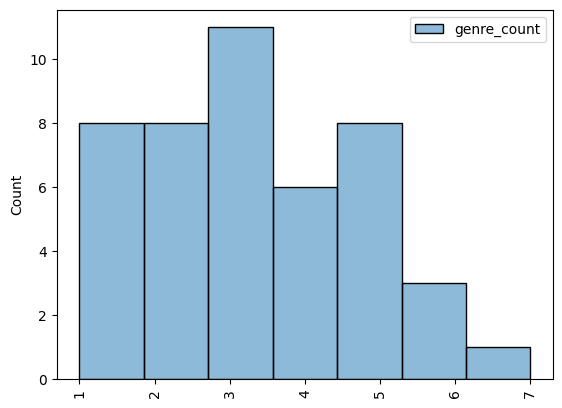

In [141]:
sns.histplot(artist_genre_count)
plt.xticks(rotation = 
           90)
plt.show()